# CGDP Feature Cleaning

## initial import and setup of Chinese GDP

In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [273]:
df = pd.read_csv("../raw_data/TradingViewData/CNGDP/ECONOMICS_CNGDP, M UNIX.csv")
df.head()

,time,open,high,low,close,Volume,Volume MA
0,-286675200,5.972000e+10,5.972000e+10,5.972000e+10,5.972000e+10,NaN,NaN
1,-255139200,5.006000e+10,5.006000e+10,5.006000e+10,5.006000e+10,NaN,NaN
2,-223603200,4.721000e+10,4.721000e+10,4.721000e+10,4.721000e+10,NaN,NaN
3,-192067200,5.071000e+10,5.071000e+10,5.071000e+10,5.071000e+10,NaN,NaN
4,-160444800,5.971000e+10,5.971000e+10,5.971000e+10,5.971000e+10,NaN,NaN


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       62 non-null     int64  
 1   open       62 non-null     float64
 2   high       62 non-null     float64
 3   low        62 non-null     float64
 4   close      62 non-null     float64
 5   Volume     0 non-null      float64
 6   Volume MA  0 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 3.5 KB


In [1]:
df['time'] = pd.to_datetime(df['time'], unit='s', origin="unix")

NameError: name 'pd' is not defined

In [276]:
df = df.set_index(["time"])

In [277]:
df = df[df.index>"1993-12-01"]

In [278]:
df = df[["close"]]

In [279]:
df

,close
time,
1994-12-01,5.643200e+11
1995-12-01,7.345500e+11
1996-12-01,8.637500e+11
1997-12-01,9.616000e+11
1998-12-01,1.029040e+12
1999-12-01,1.094000e+12
2000-12-01,1.211350e+12
2001-12-01,1.339400e+12
2002-12-01,1.470550e+12


<AxesSubplot: xlabel='time'>

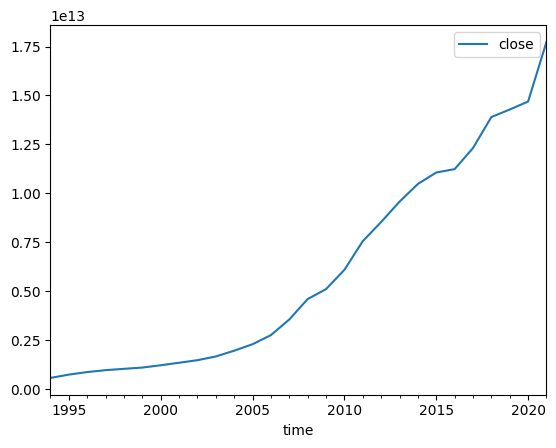

In [280]:
df.plot()

## Chinese GDP Daily Interpolation

In [281]:
len(df)

28

In [282]:
datetime_index = pd.date_range(start="1994-12-01", end="2021-12-01", name="time")
len(datetime_index)

9863

In [283]:
cgdp_df = pd.DataFrame(index=datetime_index)

In [284]:
cgdp_df["cgdp"] = df["close"]

In [285]:
cgdp_df

,cgdp
time,
1994-12-01,5.643200e+11
1994-12-02,NaN
1994-12-03,NaN
1994-12-04,NaN
1994-12-05,NaN
...,...
2021-11-27,NaN
2021-11-28,NaN
2021-11-29,NaN


In [286]:
cgdp_df.interpolate(method="linear", inplace=True)

In [287]:
cgdp_df.head(3)

,cgdp
time,
1994-12-01,5.643200e+11
1994-12-02,5.647864e+11
1994-12-03,5.652528e+11


# Merge Chinese GDP to BDI Dataframe

In [288]:
bdi_df = pd.read_csv("../raw_data/TradingViewData/BDI/cleaned_weekly_BDI.csv")

In [289]:
bdi_df

,time,close
0,1995-01-16,2059.0
1,1995-01-23,1983.0
2,1995-01-30,1959.0
3,1995-02-06,1980.0
4,1995-02-13,1992.0
...,...,...
1436,2022-10-17,1819.0
1437,2022-10-24,1534.0
1438,2022-10-31,1323.0
1439,2022-11-07,1355.0


In [290]:
bdi_df = bdi_df.set_index("time")

In [291]:
bdi_df

,close
time,
1995-01-16,2059.0
1995-01-23,1983.0
1995-01-30,1959.0
1995-02-06,1980.0
1995-02-13,1992.0
...,...
2022-10-17,1819.0
2022-10-24,1534.0
2022-10-31,1323.0


In [292]:
cgdp_df[cgdp_df["cgdp"].index > "1995-01-15"]

,cgdp
time,
1995-01-16,5.857736e+11
1995-01-17,5.862400e+11
1995-01-18,5.867064e+11
1995-01-19,5.871728e+11
1995-01-20,5.876392e+11
...,...
2021-11-27,1.770067e+13
2021-11-28,1.770902e+13
2021-11-29,1.771737e+13


In [293]:
bdi_df.index = pd.to_datetime(bdi_df.index)

In [294]:
bdi_df.index

DatetimeIndex(['1995-01-16', '1995-01-23', '1995-01-30', '1995-02-06',
               '1995-02-13', '1995-02-20', '1995-02-27', '1995-03-06',
               '1995-03-13', '1995-03-20',
               ...
               '2022-09-12', '2022-09-19', '2022-09-26', '2022-10-03',
               '2022-10-10', '2022-10-17', '2022-10-24', '2022-10-31',
               '2022-11-07', '2022-11-14'],
              dtype='datetime64[ns]', name='time', length=1441, freq=None)

In [295]:
#Combine bdi_df to cngdp_df:

combined_df = pd.merge(bdi_df, cgdp_df, on="time", how="inner")

In [296]:
combined_df

,close,cgdp
time,,
1995-01-16,2059.0,5.857736e+11
1995-01-23,1983.0,5.890383e+11
1995-01-30,1959.0,5.923030e+11
1995-02-06,1980.0,5.955677e+11
1995-02-13,1992.0,5.988324e+11
...,...,...
2021-11-01,2715.0,1.748367e+13
2021-11-08,2807.0,1.754210e+13
2021-11-15,2552.0,1.760052e+13


<AxesSubplot: xlabel='time'>

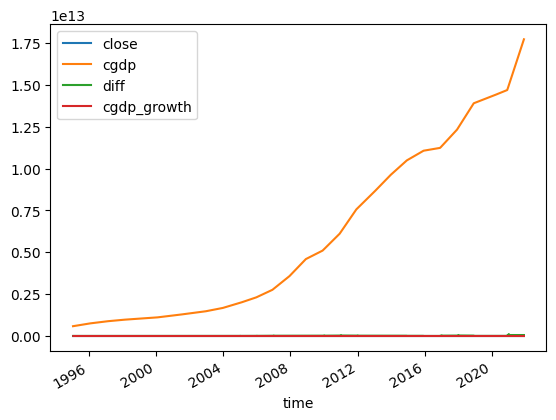

In [394]:
combined_df.plot()

<AxesSubplot: xlabel='time'>

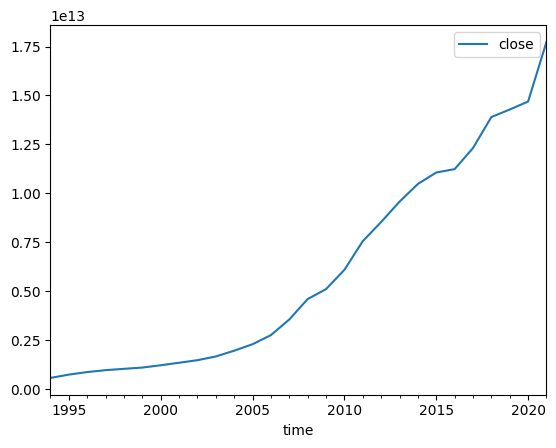

In [393]:
df.plot()

In [303]:
combined_df["cgdp"][1]

589038328767.1233

In [297]:
len(combined_df)

1392

## Adding Growth Rate of CNGDP per week

Lots of feature generation is possible as growth rate is of course dependent on start and end time-frame. For now, I will simply create the growth rate per week, then per month, and then potentially per year.

In [379]:
combined_df["diff"] = combined_df["cgdp"].diff()

In [380]:
combined_df.head()

,close,cgdp,diff
time,,,
1995-01-16,2059.0,5.857736e+11,NaN
1995-01-23,1983.0,5.890383e+11,3.264685e+09
1995-01-30,1959.0,5.923030e+11,3.264685e+09
1995-02-06,1980.0,5.955677e+11,3.264685e+09
1995-02-13,1992.0,5.988324e+11,3.264685e+09


In [398]:
combined_df.shape

(1392, 4)

In [395]:
combined_df["cgdp_growth"] = combined_df["diff"]/combined_df["cgdp"]

In [396]:
combined_df.head()

,close,cgdp,diff,cgdp_growth
time,,,,
1995-01-16,2059.0,5.857736e+11,NaN,NaN
1995-01-23,1983.0,5.890383e+11,3.264685e+09,0.005542
1995-01-30,1959.0,5.923030e+11,3.264685e+09,0.005512
1995-02-06,1980.0,5.955677e+11,3.264685e+09,0.005482
1995-02-13,1992.0,5.988324e+11,3.264685e+09,0.005452


In [397]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1392 entries, 1995-01-16 to 2021-11-29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1392 non-null   float64
 1   cgdp         1392 non-null   float64
 2   diff         1391 non-null   float64
 3   cgdp_growth  1391 non-null   float64
dtypes: float64(4)
memory usage: 54.4 KB


In [400]:
combined_df.to_csv("../raw_data/TradingViewData/CGDP/cleaned_weekly_CGDP.csv")